The datasets we use in this benchmark are inspired by the datasets from the paper scTranslator (https://pubmed.ncbi.nlm.nih.gov/41193888/). We use two of the datasets they do: a CITE-seq PBMC dataset (1), and a Perturb-CITE seq dataset (2). 

The idea of dataset (1) is to test how good a model is at predicting protein levels from RNA levels when there is no distribution shift: simply 90% of the dataset is used for training, and 10% for evaluation.

The idea of dataset (2) is to test how good a model is at generalising: the model is trained on predicting protein levels from RNA levels on the non-perturbed dataset, and then the model is evaluated on the perturbed dataset.

# PBMC data (1)

To get the full PBMC data, we first get the raw dataset from (https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM5008737) and (https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM5008738). Then, we take the subset of genes that are also used in the scTranslator paper, and we do the same for the proteins.

## Create h5ad files

In [91]:
import scanpy as sc

In [92]:
adata = sc.read_10x_mtx("./raw_data/pbmc/adt")
adata

AnnData object with n_obs × n_vars = 161764 × 228
    var: 'gene_ids', 'feature_types'

In [93]:
adata.write_h5ad("./raw_data/pbmc/prot.h5ad")

In [ ]:
adata = sc.read_10x_mtx("./raw_data/pbmc/rna")
adata

In [59]:
adata.write_h5ad("./raw_data/pbmc/rna.h5ad")

## Get correct subset of expression data

In [60]:
import scanpy as sc

In [61]:
theirs = sc.read_h5ad("./raw_data/sctranslator/dataset1/GSM5008737_RNA_finetune_withcelltype.h5ad")
theirs

AnnData object with n_obs × n_vars = 16177 × 23385
    obs: 'nCount_ADT', 'nFeature_ADT', 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'lane', 'donor', 'time', 'celltype.l1', 'celltype.l2', 'celltype.l3', 'Phase', 'nCount_SCT', 'nFeature_SCT'
    var: 'Gene symbol', 'Gene Expression', 'Entrez_Gene_Id', 'my_Id'

In [62]:
ours = sc.read_h5ad("./raw_data/pbmc/rna.h5ad")
ours

AnnData object with n_obs × n_vars = 161764 × 33538
    var: 'gene_ids', 'feature_types'

In [63]:
ours_subset = ours[:, theirs.var_names].copy()

In [64]:
theirs.obs

nCount_ADT  nFeature_ADT  nCount_RNA  nFeature_RNA  \
barcode                                                                     
E2L8_TCGAAGTCATGATGCT      3767.0         201.0      8205.0        2141.0   
L5_GACAGCCCACCGCTGA        4658.0         211.0      6758.0        1684.0   
E2L2_TGGTAGTCACGCGGTT      4700.0         207.0      9481.0        2242.0   
E2L1_GCCAGCATCCGCAGTG      3846.0         199.0     21215.0        4251.0   
L2_TTCATGTTCGCGTTTC        5347.0         219.0     17271.0        3657.0   
...                           ...           ...         ...           ...   
L1_TCACGCTAGGTCGTAG        5705.0         213.0      3524.0        1228.0   
E2L8_TCCTTCTCACACGGAA      2394.0         198.0      8142.0        2340.0   
E2L7_TGAGACTTCCGTGGCA      2119.0         129.0       918.0         505.0   
L5_TCTCACGCAGCGTTTA        3848.0         208.0      4610.0        1276.0   
L1_GTTACGAGTGAGTAAT        6829.0         219.0     15209.0        3489.0   

                      orig.ident  lane donor time celltype.l1 celltype.l2  \
barcode                                                                     
E2L8_TCGAAGTCATGATGCT       P8_0  E2L8    P8    0       CD8 T     CD8 TCM   
L5_GACAGCCCACCGCTGA         P2_7    L5    P2    7       CD8 T   CD8 Naive   
E2L2_TGGTAGTCACGCGGTT       P5_3  E2L2    P5    3       CD8 T   CD8 Naive   
E2L1_GCCAGCATCCGCAGTG       P7_7  E2L1    P7    7        Mono   CD14 Mono   
L2_TTCATGTTCGCGTTTC         P3_0    L2    P3    0          DC        cDC2   
...                          ...   ...   ...  ...         ...         ...   
L1_TCACGCTAGGTCGTAG         P2_0    L1    P2    0       CD4 T     CD4 CTL   
E2L8_TCCTTCTCACACGGAA       P7_7  E2L8    P7    7       CD4 T        Treg   
E2L7_TGAGACTTCCGTGGCA       P7_7  E2L7    P7    7        Mono   CD14 Mono   
L5_TCTCACGCAGCGTTTA         P2_3    L5    P2    3       CD4 T        Treg   
L1_GTTACGAGTGAGTAAT         P2_7    L1    P2    7          DC        cDC2   

                       celltype.l3 Phase  nCount_SCT  nFeature_SCT  
barcode                                                             
E2L8_TCGAAGTCATGATGCT    CD8 TCM_1     S      7920.0        2140.0  
L5_GACAGCCCACCGCTGA      CD8 Naive   G2M      5778.0        1684.0  
E2L2_TGGTAGTCACGCGGTT    CD8 Naive    G1      8628.0        2240.0  
E2L1_GCCAGCATCCGCAGTG    CD14 Mono    G1      9154.0        3072.0  
L2_TTCATGTTCGCGTTTC         cDC2_2    G1      5810.0        1894.0  
...                            ...   ...         ...           ...  
L1_TCACGCTAGGTCGTAG        CD4 CTL     S      4724.0        1228.0  
E2L8_TCCTTCTCACACGGAA  Treg Memory     S      8237.0        2339.0  
E2L7_TGAGACTTCCGTGGCA    CD14 Mono    G1      6621.0        1455.0  
L5_TCTCACGCAGCGTTTA    Treg Memory   G2M      4905.0        1276.0  
L1_GTTACGAGTGAGTAAT         cDC2_2    G1      5911.0        1891.0  

[16177 rows x 14 columns]

In [65]:
print(theirs.X[0])
print(ours_subset["E2L8_TCGAAGTCATGATGCT"].X.toarray())

[ 0.  0.  0. ...  4. 33.  0.]
[[ 0.  0.  0. ...  4. 33.  0.]]


In [67]:
ours_subset.write_h5ad("./raw_data/pbmc/PBMC_full_dataset_raw.h5ad")

In [68]:
sc.pp.normalize_total(ours_subset, target_sum=1e4)
sc.pp.log1p(ours_subset)
ours_subset.write_h5ad("./raw_data/pbmc/PBMC_full_dataset_preprocessed.h5ad")

In [69]:
import os

os.makedirs("./processed_data/pbmc", exist_ok=True)

In [70]:
testset = ours_subset[theirs.obs_names]
testset.write_h5ad("./processed_data/pbmc/PBMC_testset_preprocessed.h5ad")

In [71]:
trainset = ours_subset[~ours_subset.obs_names.isin(theirs.obs_names)]
trainset.write_h5ad("./processed_data/pbmc/PBMC_trainset_preprocessed.h5ad")

## Subset protein data

In [72]:
ours = sc.read_h5ad("./raw_data/pbmc/prot.h5ad")
ours.var_names

Index(['CD39', 'Rat-IgG1-1', 'CD107a', 'CD62P', 'TCR-2', 'CD30', 'CD31',
       'CD34', 'CD35', 'CD36',
       ...
       'CD169', 'CD28', 'CD161', 'CD163', 'CD138-1', 'CD164', 'CD138-2',
       'CD144', 'CD202b', 'CD11c'],
      dtype='object', length=228)

In [73]:
theirs = sc.read_h5ad("./raw_data/sctranslator/dataset1/GSM5008738_protein_finetune_withcelltype.h5ad")
theirs.var_names

Index(['CD39', 'CD107a', 'CD62P', 'TCR-2', 'CD30', 'CD31', 'CD34', 'CD35',
       'CD36', 'CD223',
       ...
       'CD169', 'CD28', 'CD161', 'CD163', 'CD138-1', 'CD164', 'CD138-2',
       'CD144', 'CD202b', 'CD11c'],
      dtype='object', length=224)

In [74]:
ours_subset = ours[:, theirs.var_names].copy()
ours_subset

AnnData object with n_obs × n_vars = 161764 × 224
    var: 'gene_ids', 'feature_types'

In [75]:
theirs.obs

nCount_ADT  nFeature_ADT  nCount_RNA  nFeature_RNA  \
barcode                                                                     
E2L8_TCGAAGTCATGATGCT      3767.0         201.0      8205.0        2141.0   
L5_GACAGCCCACCGCTGA        4658.0         211.0      6758.0        1684.0   
E2L2_TGGTAGTCACGCGGTT      4700.0         207.0      9481.0        2242.0   
E2L1_GCCAGCATCCGCAGTG      3846.0         199.0     21215.0        4251.0   
L2_TTCATGTTCGCGTTTC        5347.0         219.0     17271.0        3657.0   
...                           ...           ...         ...           ...   
L1_TCACGCTAGGTCGTAG        5705.0         213.0      3524.0        1228.0   
E2L8_TCCTTCTCACACGGAA      2394.0         198.0      8142.0        2340.0   
E2L7_TGAGACTTCCGTGGCA      2119.0         129.0       918.0         505.0   
L5_TCTCACGCAGCGTTTA        3848.0         208.0      4610.0        1276.0   
L1_GTTACGAGTGAGTAAT        6829.0         219.0     15209.0        3489.0   

                      orig.ident  lane donor time celltype.l1 celltype.l2  \
barcode                                                                     
E2L8_TCGAAGTCATGATGCT       P8_0  E2L8    P8    0       CD8 T     CD8 TCM   
L5_GACAGCCCACCGCTGA         P2_7    L5    P2    7       CD8 T   CD8 Naive   
E2L2_TGGTAGTCACGCGGTT       P5_3  E2L2    P5    3       CD8 T   CD8 Naive   
E2L1_GCCAGCATCCGCAGTG       P7_7  E2L1    P7    7        Mono   CD14 Mono   
L2_TTCATGTTCGCGTTTC         P3_0    L2    P3    0          DC        cDC2   
...                          ...   ...   ...  ...         ...         ...   
L1_TCACGCTAGGTCGTAG         P2_0    L1    P2    0       CD4 T     CD4 CTL   
E2L8_TCCTTCTCACACGGAA       P7_7  E2L8    P7    7       CD4 T        Treg   
E2L7_TGAGACTTCCGTGGCA       P7_7  E2L7    P7    7        Mono   CD14 Mono   
L5_TCTCACGCAGCGTTTA         P2_3    L5    P2    3       CD4 T        Treg   
L1_GTTACGAGTGAGTAAT         P2_7    L1    P2    7          DC        cDC2   

                       celltype.l3 Phase  nCount_SCT  nFeature_SCT  
barcode                                                             
E2L8_TCGAAGTCATGATGCT    CD8 TCM_1     S      7920.0        2140.0  
L5_GACAGCCCACCGCTGA      CD8 Naive   G2M      5778.0        1684.0  
E2L2_TGGTAGTCACGCGGTT    CD8 Naive    G1      8628.0        2240.0  
E2L1_GCCAGCATCCGCAGTG    CD14 Mono    G1      9154.0        3072.0  
L2_TTCATGTTCGCGTTTC         cDC2_2    G1      5810.0        1894.0  
...                            ...   ...         ...           ...  
L1_TCACGCTAGGTCGTAG        CD4 CTL     S      4724.0        1228.0  
E2L8_TCCTTCTCACACGGAA  Treg Memory     S      8237.0        2339.0  
E2L7_TGAGACTTCCGTGGCA    CD14 Mono    G1      6621.0        1455.0  
L5_TCTCACGCAGCGTTTA    Treg Memory   G2M      4905.0        1276.0  
L1_GTTACGAGTGAGTAAT         cDC2_2    G1      5911.0        1891.0  

[16177 rows x 14 columns]

In [76]:
theirs.X[0]

array([2.000e+00, 1.200e+01, 1.220e+02, 1.600e+01, 0.000e+00, 4.000e+01,
       3.000e+00, 3.000e+01, 0.000e+00, 5.000e+00, 1.000e+00, 1.000e+00,
       1.000e+01, 2.000e+00, 1.000e+00, 1.000e+00, 4.000e+00, 4.000e+00,
       2.000e+00, 1.400e+01, 3.000e+00, 1.000e+00, 5.000e+01, 4.000e+00,
       5.900e+01, 0.000e+00, 9.800e+01, 1.100e+01, 1.100e+01, 1.000e+00,
       1.000e+00, 5.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 2.000e+00,
       2.000e+00, 2.000e+00, 2.000e+00, 1.300e+01, 2.000e+00, 2.000e+00,
       2.000e+00, 5.000e+00, 2.600e+01, 3.000e+00, 7.000e+00, 6.000e+00,
       3.000e+00, 1.600e+01, 0.000e+00, 7.000e+00, 2.000e+00, 4.000e+00,
       1.000e+00, 2.000e+00, 4.000e+00, 1.000e+00, 7.000e+00, 3.000e+00,
       0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
       4.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 5.300e+01, 7.000e+00,
       7.000e+00, 3.000e+00, 4.000e+00, 2.700e+01, 4.200e+01, 1.000e+00,
       2.500e+01, 8.000e+00, 2.000e+00, 3.100e+01, 

In [77]:
ours_subset["E2L8_TCGAAGTCATGATGCT"].X.toarray()

array([[2.000e+00, 1.200e+01, 1.220e+02, 1.600e+01, 0.000e+00, 4.000e+01,
        3.000e+00, 3.000e+01, 0.000e+00, 5.000e+00, 1.000e+00, 1.000e+00,
        1.000e+01, 2.000e+00, 1.000e+00, 1.000e+00, 4.000e+00, 4.000e+00,
        2.000e+00, 1.400e+01, 3.000e+00, 1.000e+00, 5.000e+01, 4.000e+00,
        5.900e+01, 0.000e+00, 9.800e+01, 1.100e+01, 1.100e+01, 1.000e+00,
        1.000e+00, 5.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 2.000e+00,
        2.000e+00, 2.000e+00, 2.000e+00, 1.300e+01, 2.000e+00, 2.000e+00,
        2.000e+00, 5.000e+00, 2.600e+01, 3.000e+00, 7.000e+00, 6.000e+00,
        3.000e+00, 1.600e+01, 0.000e+00, 7.000e+00, 2.000e+00, 4.000e+00,
        1.000e+00, 2.000e+00, 4.000e+00, 1.000e+00, 7.000e+00, 3.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        4.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 5.300e+01, 7.000e+00,
        7.000e+00, 3.000e+00, 4.000e+00, 2.700e+01, 4.200e+01, 1.000e+00,
        2.500e+01, 8.000e+00, 2.000e+0

In [78]:
ours_df = ours_subset.to_df()
ours_df.index.names = ["barcode"]
ours_df

CD39  CD107a  CD62P  TCR-2  CD30   CD31  CD34   CD35  \
barcode                                                                       
L1_AAACCCAAGAAACTCA    66.0    37.0  142.0    4.0   3.0  242.0   9.0  752.0   
L1_AAACCCAAGACATACA     4.0     9.0   66.0   34.0   3.0   44.0   5.0   57.0   
L1_AAACCCACAACTGGTT     6.0     8.0   94.0   10.0   9.0  103.0   4.0   60.0   
L1_AAACCCACACGTACTA     5.0     6.0   79.0   10.0   0.0   60.0   7.0   56.0   
L1_AAACCCACAGCATACT     4.0    14.0  115.0   10.0   4.0  169.0   6.0   73.0   
...                     ...     ...    ...    ...   ...    ...   ...    ...   
E2L8_TTTGTTGGTCGTGATT   1.0    11.0   59.0   17.0   1.0   52.0   6.0   24.0   
E2L8_TTTGTTGGTGTGCCTG  49.0    38.0  256.0   11.0   1.0  188.0   6.0  519.0   
E2L8_TTTGTTGGTTAGTTCG  24.0    13.0   78.0    4.0   4.0   37.0   5.0  851.0   
E2L8_TTTGTTGGTTGGCTAT  43.0    24.0  287.0    8.0   3.0  181.0  14.0   96.0   
E2L8_TTTGTTGTCTCATGGA  30.0    31.0  146.0   10.0   1.0  194.0   5.0  274.0   

                       CD36  CD223  ...  CD169  CD28  CD161  CD163  CD138-1  \
barcode                             ...                                       
L1_AAACCCAAGAAACTCA    14.0    5.0  ...    5.0  31.0    3.0   13.0      5.0   
L1_AAACCCAAGACATACA     0.0    8.0  ...    4.0  61.0   12.0    8.0      4.0   
L1_AAACCCACAACTGGTT     2.0    6.0  ...    5.0  37.0    0.0    6.0      5.0   
L1_AAACCCACACGTACTA     1.0   11.0  ...    1.0  19.0    8.0   10.0      7.0   
L1_AAACCCACAGCATACT     5.0    4.0  ...    4.0  46.0    0.0    1.0      4.0   
...                     ...    ...  ...    ...   ...    ...    ...      ...   
E2L8_TTTGTTGGTCGTGATT   1.0    4.0  ...    0.0  26.0    0.0    2.0      4.0   
E2L8_TTTGTTGGTGTGCCTG  14.0    8.0  ...   26.0  16.0    0.0   13.0      7.0   
E2L8_TTTGTTGGTTAGTTCG   4.0    0.0  ...    1.0  14.0    1.0    5.0      4.0   
E2L8_TTTGTTGGTTGGCTAT   4.0    4.0  ...   14.0  19.0    7.0    8.0      7.0   
E2L8_TTTGTTGTCTCATGGA   6.0    3.0  ...    7.0  21.0    2.0    7.0      5.0   

                       CD164  CD138-2  CD144  CD202b  CD11c  
barcode                                                      
L1_AAACCCAAGAAACTCA      5.0      9.0    8.0    20.0   50.0  
L1_AAACCCAAGACATACA      1.0      3.0    7.0    10.0   22.0  
L1_AAACCCACAACTGGTT      1.0     13.0    7.0     8.0   13.0  
L1_AAACCCACACGTACTA      0.0     11.0    3.0    10.0   13.0  
L1_AAACCCACAGCATACT      1.0     12.0    5.0    13.0   12.0  
...                      ...      ...    ...     ...    ...  
E2L8_TTTGTTGGTCGTGATT    3.0      2.0    5.0    10.0    7.0  
E2L8_TTTGTTGGTGTGCCTG   11.0      9.0    5.0     6.0   90.0  
E2L8_TTTGTTGGTTAGTTCG   23.0      5.0    2.0     2.0   15.0  
E2L8_TTTGTTGGTTGGCTAT    2.0     13.0    6.0     7.0   75.0  
E2L8_TTTGTTGTCTCATGGA    6.0      7.0    4.0     2.0   54.0  

[161764 rows x 224 columns]

In [79]:
ours_df.to_csv("./raw_data/pbmc/prot_full.csv")

In [80]:
testset = ours_subset[theirs.obs_names].to_df()
testset.index.names = ["barcode"]
testset.to_csv("./processed_data/pbmc/prot_test.csv")

In [81]:
trainset = ours_subset[~ours_subset.obs_names.isin(theirs.obs_names)].to_df()
trainset.index.names = ["barcode"]
trainset.to_csv("./processed_data/pbmc/prot_train.csv")

# Perturb-CITE seq (2)

## Process RNA data

We get the raw data from https://singlecell.broadinstitute.org/single_cell/study/SCP1064/multi-modal-pooled-perturb-cite-seq-screens-in-patient-models-define-novel-mechanisms-of-cancer-immune-evasion#study-download and preprocess it for use by scFM models.

First, the RNA data:
1. We take the raw .csv files and convert them to .h5ad
2. We combine them all into one big .h5ad file, and then take the subset that corresponds to the co-cultured cells (https://pubmed.ncbi.nlm.nih.gov/41193888/). 
3. Finally, we split the data into non-perturbed and perturbed cells. The non-perturbed cells will be the training set, the perturbed cells will be the test set to test model generalisation.

Next, the protein data:
1. We take the raw CITE expression csv, take away the technical control (Mouse and Rat antibodies), and again take a subset that corresponds to the co-cultured cells.
2. Next, we then preprocess the values according to (https://pubmed.ncbi.nlm.nih.gov/41193888/).
3. Finally, we subset the data into the non-perturbed and the perturbed set (train and test, respectively).

### Convert RNA expression csv files to h5ad

In [1]:
import anndata as ad
import pandas as pd
import scipy.sparse as sp

In [2]:
def csv_to_h5ad(dataset: str):
    dset = pd.read_csv(f"{dataset}.csv", index_col=0)
    X_sparse = sp.csr_matrix(dset.T)
    adata = ad.AnnData(X=X_sparse)
    adata.obs_names = dset.columns
    adata.var_names = dset.index
    adata.write_h5ad(f"{dataset}.h5ad")

In [3]:
csv_to_h5ad("./raw_data/SCP1064/expression/RNA_expression_subset1a")

In [4]:
csv_to_h5ad("./raw_data/SCP1064/expression/RNA_expression_subset1b_alpha")

In [5]:
csv_to_h5ad("./raw_data/SCP1064/expression/RNA_expression_subset1b_beta")

In [6]:
csv_to_h5ad("./raw_data/SCP1064/expression/RNA_expression_subset2")

In [7]:
csv_to_h5ad("./raw_data/SCP1064/expression/RNA_expression_subset3")

In [8]:
csv_to_h5ad("./raw_data/SCP1064/expression/RNA_expression_subset4")

### Combine h5ad files

In [10]:
adata1 = ad.read_h5ad("./raw_data/SCP1064/expression/RNA_expression_subset1a.h5ad")

In [11]:
adata2 = ad.read_h5ad("./raw_data/SCP1064/expression/RNA_expression_subset1b_alpha.h5ad")

In [12]:
adata3 = ad.read_h5ad("./raw_data/SCP1064/expression/RNA_expression_subset1b_beta.h5ad")

In [13]:
adata4 = ad.read_h5ad("./raw_data/SCP1064/expression/RNA_expression_subset2.h5ad")

In [14]:
adata5 = ad.read_h5ad("./raw_data/SCP1064/expression/RNA_expression_subset3.h5ad")

In [15]:
adata6 = ad.read_h5ad("./raw_data/SCP1064/expression/RNA_expression_subset4.h5ad")

In [16]:
adata_combined = ad.concat([adata1, adata2, adata3, adata4, adata5, adata6], axis=0, join="outer")
adata_combined.write_h5ad("./raw_data/SCP1064/expression/full_RNA_expression_matrix.h5ad")

In [17]:
metadata = pd.read_csv("./raw_data/SCP1064/metadata/RNA_metadata.csv", index_col=0)
metadata = metadata[1:]
metadata_coculture = metadata[metadata["condition"] == "Co-culture"]
coculture_names = metadata_coculture.index

/tmp/ipykernel_148464/3363679144.py:1: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv("./raw_data/SCP1064/metadata/RNA_metadata.csv", index_col=0)


In [18]:
adata_coculture = adata_combined[coculture_names]
adata_coculture

View of AnnData object with n_obs × n_vars = 73114 × 23712

In [33]:
adata_coculture.write_h5ad("./raw_data/SCP1064/expression/coculture_RNA_expression_matrix.h5ad")

In [42]:
import os

os.makedirs("./processed_data/perturb", exist_ok=True)

In [44]:
adata_coculture[metadata_coculture[metadata_coculture["sgRNA"].isna()].index].write_h5ad(
    "./processed_data/perturb/control_rna.h5ad"
)
adata_coculture[metadata_coculture[metadata_coculture["sgRNA"].notna()].index].write_h5ad(
    "./processed_data/perturb/perturbed_rna.h5ad"
)

## Process protein data

In [23]:
import anndata as ad
import numpy as np
import pandas as pd

In [25]:
raw_cite = pd.read_csv("./raw_data/SCP1064/other/raw_CITE_expression.csv", index_col=0).T
raw_cite

CD117  CD119  CD140a  CD140b  CD172a  CD184  CD202b  CD274  CD29  \
CELL_7700       0     10       1       0       1      1       0      1    86   
CELL_7701       3     15       1       2       9      6       3      5    42   
CELL_7702       2     10       1       1       1      3       0     21   264   
CELL_7703       2     11       0       1       2     10       0      0    85   
CELL_7704       1      6       0       0       0      4       0      3   107   
...           ...    ...     ...     ...     ...    ...     ...    ...   ...   
CELL_91646      0      1       1       0       2      2       1      4   109   
CELL_91647      0     26       2       1       1      2       0     26   152   
CELL_91648      0      5       0       0       4      2       1      3    50   
CELL_91649      0      4       2       0       1      1       1     20   106   
CELL_91650      1      8       4       1       3      3       0     32   121   

            CD309  ...  CD59  CD61  HLA_A  Rat_IgG2a  Mouse_IgG1  Mouse_IgG2a  \
CELL_7700       0  ...     2     0     15          2           0            0   
CELL_7701       5  ...    11     1     11          5           0            1   
CELL_7702       1  ...    12     4     29          1           0            1   
CELL_7703       6  ...    10     3     24          3           1            4   
CELL_7704       0  ...    12     0      7          0           0            0   
...           ...  ...   ...   ...    ...        ...         ...          ...   
CELL_91646      0  ...    13     0      8          0           1            1   
CELL_91647      0  ...     2     2     10          0           0            1   
CELL_91648      0  ...     4     2     12          2           0            1   
CELL_91649      2  ...     8     1     16          0           0            1   
CELL_91650      2  ...     7     2     21          0           0            1   

            Mouse_IgG2b  HLA_E  CD9  CD279  
CELL_7700             1      0   14      1  
CELL_7701             2      3   17      9  
CELL_7702             0      0  135      1  
CELL_7703             1      3   69      2  
CELL_7704             0      0   30      1  
...                 ...    ...  ...    ...  
CELL_91646            0      0   31      0  
CELL_91647            0      0   71      1  
CELL_91648            0      1    3      0  
CELL_91649            0      3   65      0  
CELL_91650            0      1   30      0  

[218328 rows x 24 columns]

In [26]:
protein_columns = []
for col in raw_cite.columns:
    if not col.startswith("Mouse") and not col.startswith("Rat"):
        protein_columns.append(col)
protein_cite = raw_cite[protein_columns]

In [27]:
metadata = pd.read_csv("./raw_data/SCP1064/metadata/RNA_metadata.csv", index_col=0)
metadata = metadata[1:]
metadata_coculture = metadata[metadata["condition"] == "Co-culture"]
coculture_names = metadata_coculture.index

/tmp/ipykernel_148464/3363679144.py:1: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv("./raw_data/SCP1064/metadata/RNA_metadata.csv", index_col=0)


In [28]:
coculture_cite = protein_cite.loc[coculture_names]
coculture_cite

CD117  CD119  CD140a  CD140b  CD172a  CD184  CD202b  CD274  CD29  \
NAME                                                                            
CELL_145218      0     15       0       0       1      0       0      8   124   
CELL_145219      0      9       0       0       2      0       0     10    74   
CELL_145220      0      9       0       0       0      0       0     32   141   
CELL_145221      0      1       0       0       0      0       0      1    28   
CELL_145222      0      4       0       0       1      0       0     39   245   
...            ...    ...     ...     ...     ...    ...     ...    ...   ...   
CELL_218327      0      1       0       0       0      0       0     22    95   
CELL_218328      0      4       0       0       1      0       0      1    60   
CELL_218329      0      3       0       0       0      0       0      1   180   
CELL_218330      0      2       0       0       1      0       0     12   129   
CELL_218331      1      2       0       0       0      0       0     23    65   

             CD309  CD44  CD47  CD49f  CD58  CD59  CD61  HLA_A  HLA_E  CD9  \
NAME                                                                         
CELL_145218      0   703    25     17     4     6     2     38      0   27   
CELL_145219      1   479    36      4     1     0     0     73      1   16   
CELL_145220      0    14    50     42     7     6     0    104      0   60   
CELL_145221      0   114     5     12     1     0     0     18      0   12   
CELL_145222      0   580    31     47     8     9     2     64      1  127   
...            ...   ...   ...    ...   ...   ...   ...    ...    ...  ...   
CELL_218327      0   502    23     27     3     6     0     39      0   29   
CELL_218328      0   561    14      7     2     3     2     10      0   10   
CELL_218329      0   793    51     57     2     3     0     42      0   19   
CELL_218330      0   671    20      8     4     5     3     72      0   16   
CELL_218331      0   315    16     10     2     8     0     30      0   40   

             CD279  
NAME                
CELL_145218      1  
CELL_145219      1  
CELL_145220      0  
CELL_145221      0  
CELL_145222      1  
...            ...  
CELL_218327      0  
CELL_218328      0  
CELL_218329      0  
CELL_218330      0  
CELL_218331      0  

[73114 rows x 20 columns]

In [29]:
coculture_array = coculture_cite.to_numpy()
normalised_array = (coculture_array - coculture_array.min(axis=1, keepdims=True)) / (
    coculture_array.max(axis=1, keepdims=True) - coculture_array.min(axis=1, keepdims=True)
) * (1 - 1e-8) + 1e-8
coculture_cite = pd.DataFrame(normalised_array, index=coculture_cite.index, columns=coculture_cite.columns)
coculture_cite

CD117     CD119        CD140a        CD140b        CD172a  \
NAME                                                                            
CELL_145218  1.000000e-08  0.021337  1.000000e-08  1.000000e-08  1.422485e-03   
CELL_145219  1.000000e-08  0.018789  1.000000e-08  1.000000e-08  4.175375e-03   
CELL_145220  1.000000e-08  0.063830  1.000000e-08  1.000000e-08  1.000000e-08   
CELL_145221  1.000000e-08  0.008772  1.000000e-08  1.000000e-08  1.000000e-08   
CELL_145222  1.000000e-08  0.006897  1.000000e-08  1.000000e-08  1.724148e-03   
...                   ...       ...           ...           ...           ...   
CELL_218327  1.000000e-08  0.001992  1.000000e-08  1.000000e-08  1.000000e-08   
CELL_218328  1.000000e-08  0.007130  1.000000e-08  1.000000e-08  1.782541e-03   
CELL_218329  1.000000e-08  0.003783  1.000000e-08  1.000000e-08  1.000000e-08   
CELL_218330  1.000000e-08  0.002981  1.000000e-08  1.000000e-08  1.490323e-03   
CELL_218331  3.174613e-03  0.006349  1.000000e-08  1.000000e-08  1.000000e-08   

                    CD184        CD202b     CD274      CD29         CD309  \
NAME                                                                        
CELL_145218  1.000000e-08  1.000000e-08  0.011380  0.176387  1.000000e-08   
CELL_145219  1.000000e-08  1.000000e-08  0.020877  0.154489  2.087693e-03   
CELL_145220  1.000000e-08  1.000000e-08  0.226950  1.000000  1.000000e-08   
CELL_145221  1.000000e-08  1.000000e-08  0.008772  0.245614  1.000000e-08   
CELL_145222  1.000000e-08  1.000000e-08  0.067241  0.422414  1.000000e-08   
...                   ...           ...       ...       ...           ...   
CELL_218327  1.000000e-08  1.000000e-08  0.043825  0.189243  1.000000e-08   
CELL_218328  1.000000e-08  1.000000e-08  0.001783  0.106952  1.000000e-08   
CELL_218329  1.000000e-08  1.000000e-08  0.001261  0.226986  1.000000e-08   
CELL_218330  1.000000e-08  1.000000e-08  0.017884  0.192250  1.000000e-08   
CELL_218331  1.000000e-08  1.000000e-08  0.073016  0.206349  1.000000e-08   

                 CD44      CD47     CD49f      CD58          CD59  \
NAME                                                                
CELL_145218  1.000000  0.035562  0.024182  0.005690  8.534861e-03   
CELL_145219  1.000000  0.075157  0.008351  0.002088  1.000000e-08   
CELL_145220  0.099291  0.354610  0.297872  0.049645  4.255320e-02   
CELL_145221  1.000000  0.043860  0.105263  0.008772  1.000000e-08   
CELL_145222  1.000000  0.053448  0.081034  0.013793  1.551725e-02   
...               ...       ...       ...       ...           ...   
CELL_218327  1.000000  0.045817  0.053785  0.005976  1.195220e-02   
CELL_218328  1.000000  0.024955  0.012478  0.003565  5.347604e-03   
CELL_218329  1.000000  0.064313  0.071879  0.002522  3.783112e-03   
CELL_218330  1.000000  0.029806  0.011923  0.005961  7.451575e-03   
CELL_218331  1.000000  0.050794  0.031746  0.006349  2.539684e-02   

                     CD61     HLA_A         HLA_E       CD9         CD279  
NAME                                                                       
CELL_145218  2.844960e-03  0.054054  1.000000e-08  0.038407  1.422485e-03  
CELL_145219  1.000000e-08  0.152401  2.087693e-03  0.033403  2.087693e-03  
CELL_145220  1.000000e-08  0.737589  1.000000e-08  0.425532  1.000000e-08  
CELL_145221  1.000000e-08  0.157895  1.000000e-08  0.105263  1.000000e-08  
CELL_145222  3.448286e-03  0.110345  1.724148e-03  0.218966  1.724148e-03  
...                   ...       ...           ...       ...           ...  
CELL_218327  1.000000e-08  0.077689  1.000000e-08  0.057769  1.000000e-08  
CELL_218328  3.565072e-03  0.017825  1.000000e-08  0.017825  1.000000e-08  
CELL_218329  1.000000e-08  0.052963  1.000000e-08  0.023960  1.000000e-08  
CELL_218330  4.470949e-03  0.107303  1.000000e-08  0.023845  1.000000e-08  
CELL_218331  1.000000e-08  0.095238  1.000000e-08  0.126984  1.000000e-08  

[73114 rows x 20 columns]

In [31]:
coculture_cite.loc[metadata_coculture[metadata_coculture["sgRNA"].notna()].index].to_csv(
    "./processed_data/perturb/perturbed_protein.csv"
)
coculture_cite.loc[metadata_coculture[metadata_coculture["sgRNA"].isna()].index].to_csv(
    "./processed_data/perturb/control_protein.csv"
)

In [32]:
coculture_cite

CD117     CD119        CD140a        CD140b        CD172a  \
NAME                                                                            
CELL_145218  1.000000e-08  0.021337  1.000000e-08  1.000000e-08  1.422485e-03   
CELL_145219  1.000000e-08  0.018789  1.000000e-08  1.000000e-08  4.175375e-03   
CELL_145220  1.000000e-08  0.063830  1.000000e-08  1.000000e-08  1.000000e-08   
CELL_145221  1.000000e-08  0.008772  1.000000e-08  1.000000e-08  1.000000e-08   
CELL_145222  1.000000e-08  0.006897  1.000000e-08  1.000000e-08  1.724148e-03   
...                   ...       ...           ...           ...           ...   
CELL_218327  1.000000e-08  0.001992  1.000000e-08  1.000000e-08  1.000000e-08   
CELL_218328  1.000000e-08  0.007130  1.000000e-08  1.000000e-08  1.782541e-03   
CELL_218329  1.000000e-08  0.003783  1.000000e-08  1.000000e-08  1.000000e-08   
CELL_218330  1.000000e-08  0.002981  1.000000e-08  1.000000e-08  1.490323e-03   
CELL_218331  3.174613e-03  0.006349  1.000000e-08  1.000000e-08  1.000000e-08   

                    CD184        CD202b     CD274      CD29         CD309  \
NAME                                                                        
CELL_145218  1.000000e-08  1.000000e-08  0.011380  0.176387  1.000000e-08   
CELL_145219  1.000000e-08  1.000000e-08  0.020877  0.154489  2.087693e-03   
CELL_145220  1.000000e-08  1.000000e-08  0.226950  1.000000  1.000000e-08   
CELL_145221  1.000000e-08  1.000000e-08  0.008772  0.245614  1.000000e-08   
CELL_145222  1.000000e-08  1.000000e-08  0.067241  0.422414  1.000000e-08   
...                   ...           ...       ...       ...           ...   
CELL_218327  1.000000e-08  1.000000e-08  0.043825  0.189243  1.000000e-08   
CELL_218328  1.000000e-08  1.000000e-08  0.001783  0.106952  1.000000e-08   
CELL_218329  1.000000e-08  1.000000e-08  0.001261  0.226986  1.000000e-08   
CELL_218330  1.000000e-08  1.000000e-08  0.017884  0.192250  1.000000e-08   
CELL_218331  1.000000e-08  1.000000e-08  0.073016  0.206349  1.000000e-08   

                 CD44      CD47     CD49f      CD58          CD59  \
NAME                                                                
CELL_145218  1.000000  0.035562  0.024182  0.005690  8.534861e-03   
CELL_145219  1.000000  0.075157  0.008351  0.002088  1.000000e-08   
CELL_145220  0.099291  0.354610  0.297872  0.049645  4.255320e-02   
CELL_145221  1.000000  0.043860  0.105263  0.008772  1.000000e-08   
CELL_145222  1.000000  0.053448  0.081034  0.013793  1.551725e-02   
...               ...       ...       ...       ...           ...   
CELL_218327  1.000000  0.045817  0.053785  0.005976  1.195220e-02   
CELL_218328  1.000000  0.024955  0.012478  0.003565  5.347604e-03   
CELL_218329  1.000000  0.064313  0.071879  0.002522  3.783112e-03   
CELL_218330  1.000000  0.029806  0.011923  0.005961  7.451575e-03   
CELL_218331  1.000000  0.050794  0.031746  0.006349  2.539684e-02   

                     CD61     HLA_A         HLA_E       CD9         CD279  
NAME                                                                       
CELL_145218  2.844960e-03  0.054054  1.000000e-08  0.038407  1.422485e-03  
CELL_145219  1.000000e-08  0.152401  2.087693e-03  0.033403  2.087693e-03  
CELL_145220  1.000000e-08  0.737589  1.000000e-08  0.425532  1.000000e-08  
CELL_145221  1.000000e-08  0.157895  1.000000e-08  0.105263  1.000000e-08  
CELL_145222  3.448286e-03  0.110345  1.724148e-03  0.218966  1.724148e-03  
...                   ...       ...           ...       ...           ...  
CELL_218327  1.000000e-08  0.077689  1.000000e-08  0.057769  1.000000e-08  
CELL_218328  3.565072e-03  0.017825  1.000000e-08  0.017825  1.000000e-08  
CELL_218329  1.000000e-08  0.052963  1.000000e-08  0.023960  1.000000e-08  
CELL_218330  4.470949e-03  0.107303  1.000000e-08  0.023845  1.000000e-08  
CELL_218331  1.000000e-08  0.095238  1.000000e-08  0.126984  1.000000e-08  

[73114 rows x 20 columns]

## Data inspection

In [48]:
import anndata as adata

adata_coculture = adata.read_h5ad("./raw_data/SCP1064/expression/coculture_RNA_expression_matrix.h5ad")

In [49]:
adata_coculture

AnnData object with n_obs × n_vars = 73114 × 23712

/opt/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


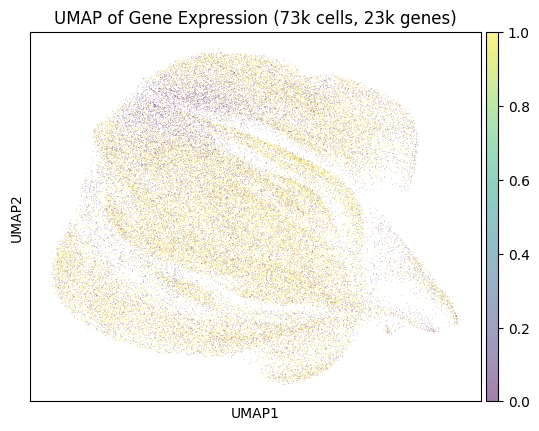

Cells without sgRNA: 26687
Cells with sgRNA: 46427


In [50]:
import matplotlib.pyplot as plt
import scanpy as sc
import umap

# Option 1: Use scanpy's built-in UMAP (recommended for scRNA-seq)
# This handles preprocessing automatically
sc.pp.pca(adata_coculture, n_comps=50)  # PCA first (standard for scRNA-seq)
sc.pp.neighbors(adata_coculture, n_neighbors=15, n_pcs=50)
sc.tl.umap(adata_coculture)

# Create labels
labels = np.zeros(len(adata_coculture))
has_sgrna_idx = metadata_coculture[metadata_coculture["sgRNA"].notna()].index
labels[adata_coculture.obs.index.isin(has_sgrna_idx)] = 1

# Add labels to adata
adata_coculture.obs["has_sgRNA"] = labels.astype(int)

# Plot
sc.pl.umap(
    adata_coculture,
    color="has_sgRNA",
    palette=["#1f77b4", "#ff7f0e"],
    size=1,
    alpha=0.5,
    title="UMAP of Gene Expression (73k cells, 23k genes)",
)

# Print counts
print(f"Cells without sgRNA: {(labels == 0).sum()}")
print(f"Cells with sgRNA: {(labels == 1).sum()}")

In [51]:
adata_coculture

AnnData object with n_obs × n_vars = 73114 × 23712
    obs: 'has_sgRNA'
    uns: 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

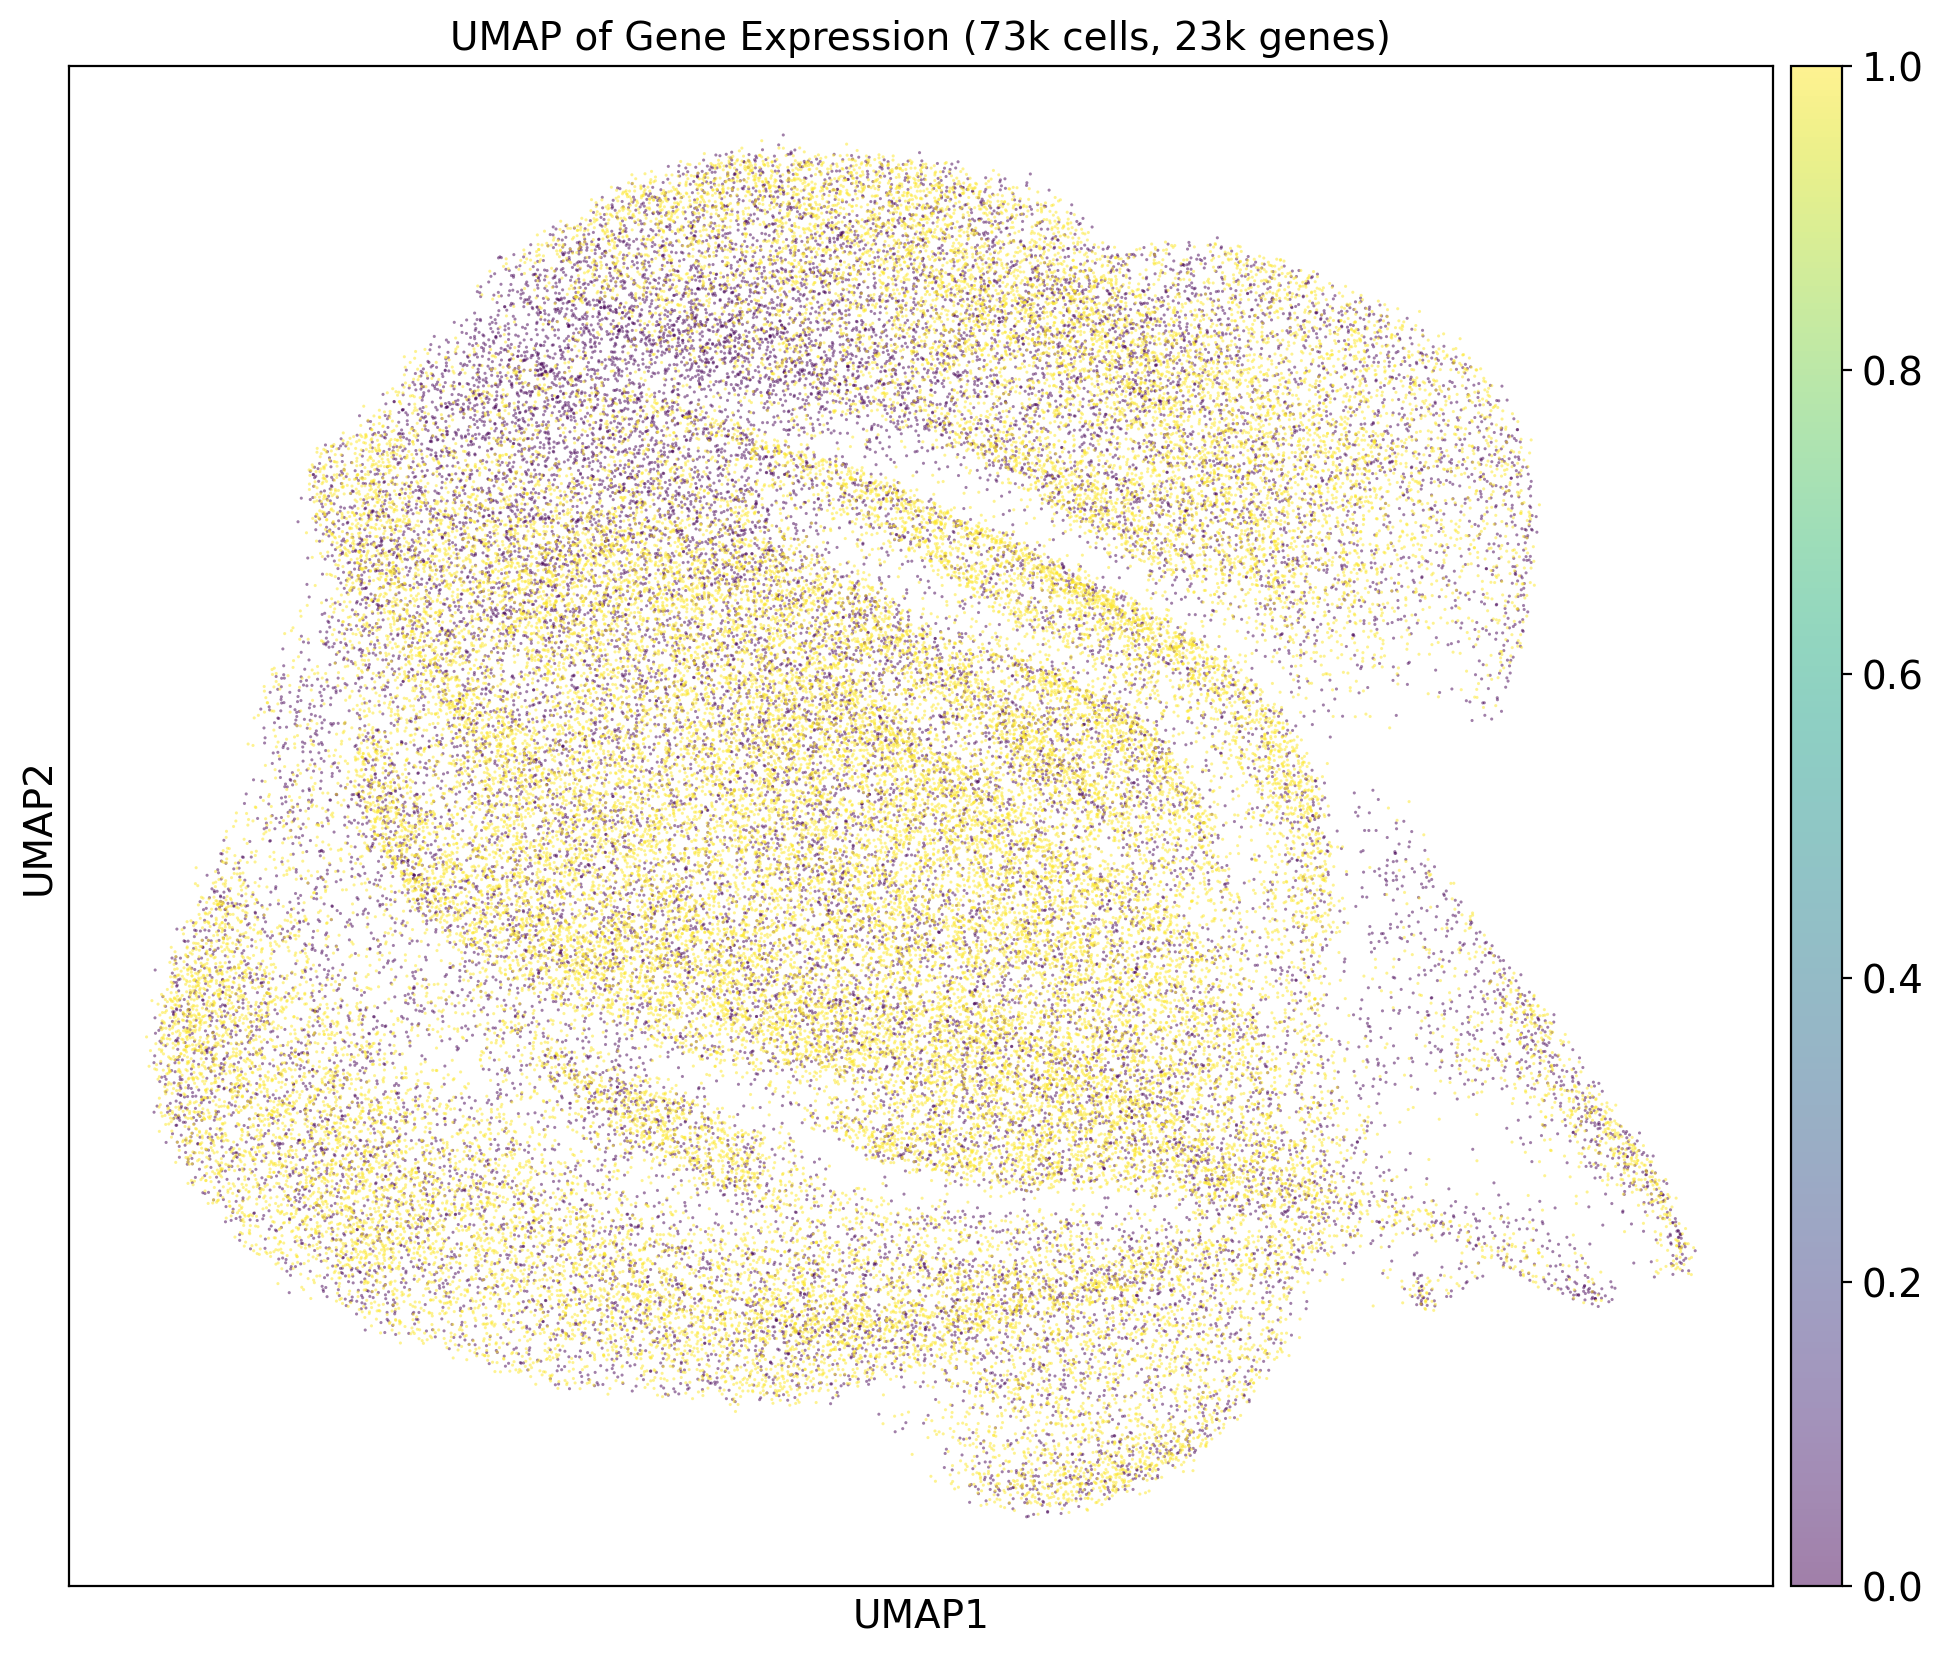

Cells without sgRNA: 26687
Cells with sgRNA: 46427


In [52]:
sc.settings.set_figure_params(figsize=(12, 10), dpi=100)


# Plot
sc.pl.umap(
    adata_coculture,
    color="has_sgRNA",
    palette=["#1f77b4", "#ff7f0e"],
    size=5,
    alpha=0.5,
    title="UMAP of Gene Expression (73k cells, 23k genes)",
)

# Print counts
print(f"Cells without sgRNA: {(labels == 0).sum()}")
print(f"Cells with sgRNA: {(labels == 1).sum()}")

/opt/venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


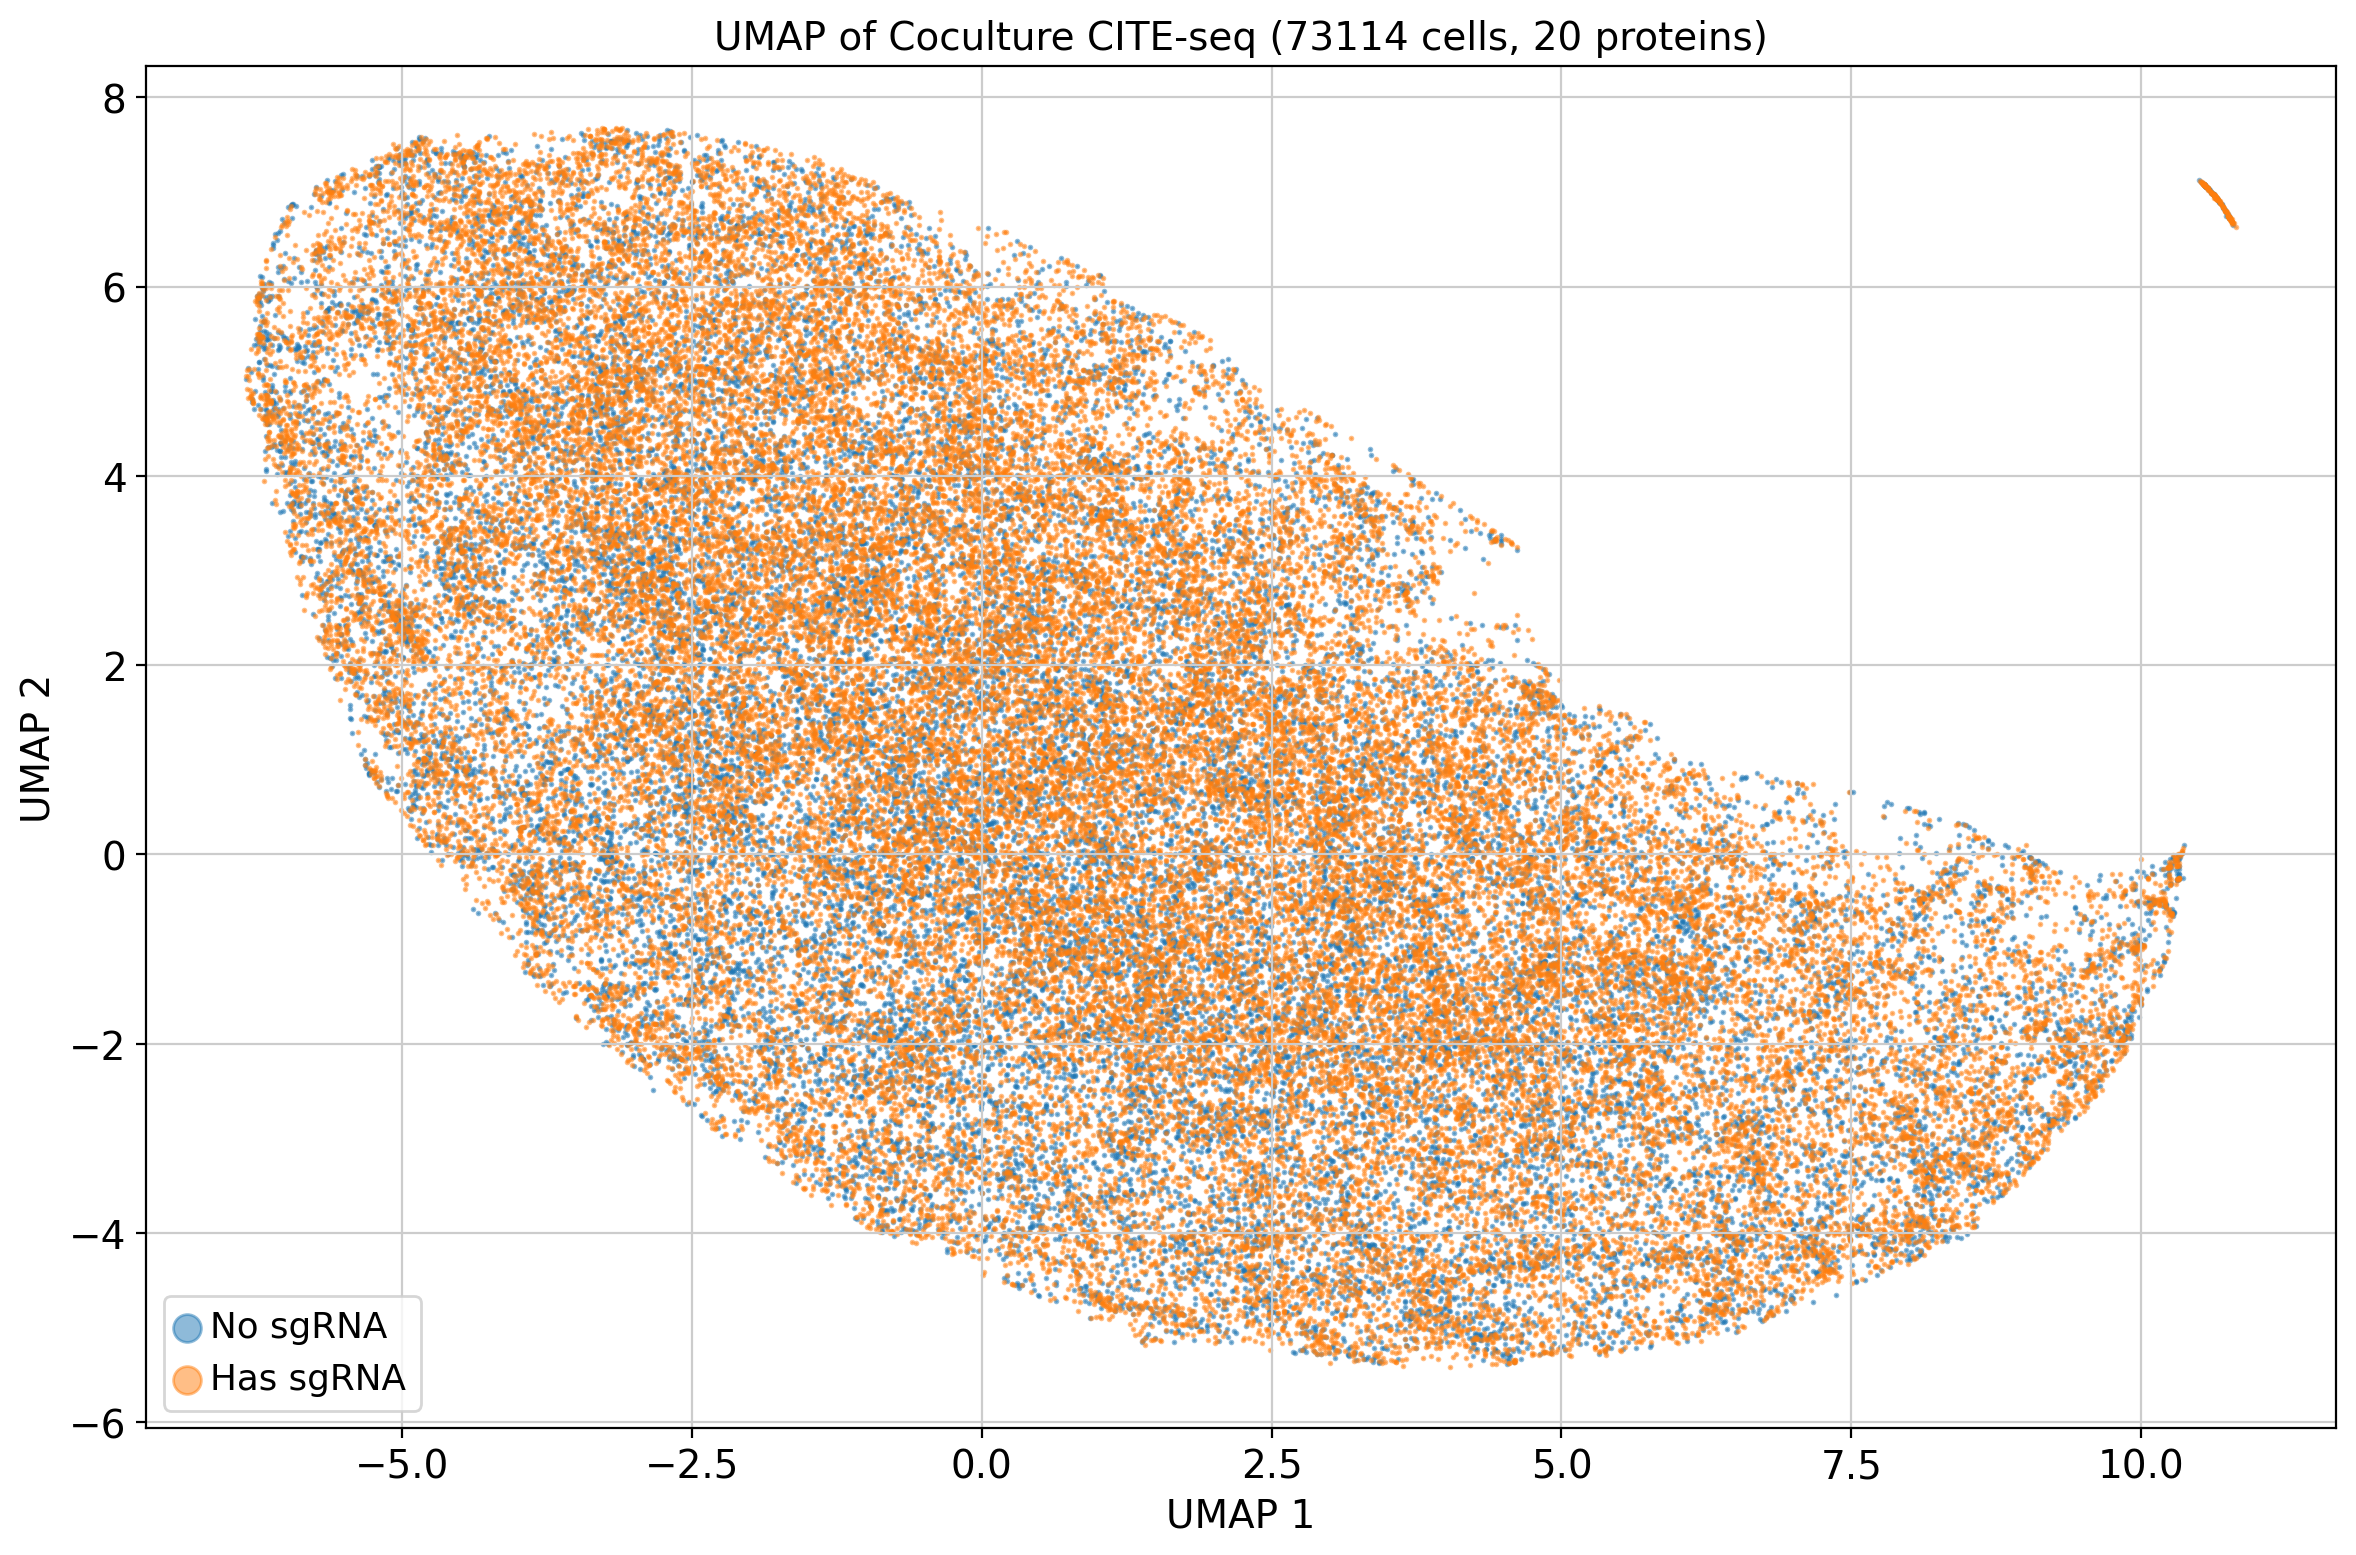

Cells without sgRNA: 26687
Cells with sgRNA: 46427


In [ ]:
import numpy as np

# Create binary labels: 1 for cells with sgRNA, 0 for cells without
labels = np.zeros(len(coculture_cite))
has_sgrna_idx = metadata_coculture[metadata_coculture["sgRNA"].notna()].index
labels[coculture_cite.index.isin(has_sgrna_idx)] = 1

# Create UMAP embedding
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, metric="euclidean", random_state=42)

embedding = reducer.fit_transform(coculture_cite)

# Plot with labels
plt.figure(figsize=(12, 8))
colors = ["#1f77b4", "#ff7f0e"]  # Blue for no sgRNA, orange for sgRNA
labels_str = ["No sgRNA", "Has sgRNA"]

for i, (color, label) in enumerate(zip(colors, labels_str, strict=True)):
    mask = labels == i
    plt.scatter(embedding[mask, 0], embedding[mask, 1], c=color, label=label, s=1, alpha=0.5)

plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title(f"UMAP of Coculture CITE-seq ({len(coculture_cite)} cells, 20 proteins)")
plt.legend(markerscale=10)
plt.tight_layout()
plt.show()

# Print counts
print(f"Cells without sgRNA: {(labels == 0).sum()}")
print(f"Cells with sgRNA: {(labels == 1).sum()}")

In [54]:
coculture_cite

CD117     CD119        CD140a        CD140b        CD172a  \
NAME                                                                            
CELL_145218  1.000000e-08  0.021337  1.000000e-08  1.000000e-08  1.422485e-03   
CELL_145219  1.000000e-08  0.018789  1.000000e-08  1.000000e-08  4.175375e-03   
CELL_145220  1.000000e-08  0.063830  1.000000e-08  1.000000e-08  1.000000e-08   
CELL_145221  1.000000e-08  0.008772  1.000000e-08  1.000000e-08  1.000000e-08   
CELL_145222  1.000000e-08  0.006897  1.000000e-08  1.000000e-08  1.724148e-03   
...                   ...       ...           ...           ...           ...   
CELL_218327  1.000000e-08  0.001992  1.000000e-08  1.000000e-08  1.000000e-08   
CELL_218328  1.000000e-08  0.007130  1.000000e-08  1.000000e-08  1.782541e-03   
CELL_218329  1.000000e-08  0.003783  1.000000e-08  1.000000e-08  1.000000e-08   
CELL_218330  1.000000e-08  0.002981  1.000000e-08  1.000000e-08  1.490323e-03   
CELL_218331  3.174613e-03  0.006349  1.000000e-08  1.000000e-08  1.000000e-08   

                    CD184        CD202b     CD274      CD29         CD309  \
NAME                                                                        
CELL_145218  1.000000e-08  1.000000e-08  0.011380  0.176387  1.000000e-08   
CELL_145219  1.000000e-08  1.000000e-08  0.020877  0.154489  2.087693e-03   
CELL_145220  1.000000e-08  1.000000e-08  0.226950  1.000000  1.000000e-08   
CELL_145221  1.000000e-08  1.000000e-08  0.008772  0.245614  1.000000e-08   
CELL_145222  1.000000e-08  1.000000e-08  0.067241  0.422414  1.000000e-08   
...                   ...           ...       ...       ...           ...   
CELL_218327  1.000000e-08  1.000000e-08  0.043825  0.189243  1.000000e-08   
CELL_218328  1.000000e-08  1.000000e-08  0.001783  0.106952  1.000000e-08   
CELL_218329  1.000000e-08  1.000000e-08  0.001261  0.226986  1.000000e-08   
CELL_218330  1.000000e-08  1.000000e-08  0.017884  0.192250  1.000000e-08   
CELL_218331  1.000000e-08  1.000000e-08  0.073016  0.206349  1.000000e-08   

                 CD44      CD47     CD49f      CD58          CD59  \
NAME                                                                
CELL_145218  1.000000  0.035562  0.024182  0.005690  8.534861e-03   
CELL_145219  1.000000  0.075157  0.008351  0.002088  1.000000e-08   
CELL_145220  0.099291  0.354610  0.297872  0.049645  4.255320e-02   
CELL_145221  1.000000  0.043860  0.105263  0.008772  1.000000e-08   
CELL_145222  1.000000  0.053448  0.081034  0.013793  1.551725e-02   
...               ...       ...       ...       ...           ...   
CELL_218327  1.000000  0.045817  0.053785  0.005976  1.195220e-02   
CELL_218328  1.000000  0.024955  0.012478  0.003565  5.347604e-03   
CELL_218329  1.000000  0.064313  0.071879  0.002522  3.783112e-03   
CELL_218330  1.000000  0.029806  0.011923  0.005961  7.451575e-03   
CELL_218331  1.000000  0.050794  0.031746  0.006349  2.539684e-02   

                     CD61     HLA_A         HLA_E       CD9         CD279  
NAME                                                                       
CELL_145218  2.844960e-03  0.054054  1.000000e-08  0.038407  1.422485e-03  
CELL_145219  1.000000e-08  0.152401  2.087693e-03  0.033403  2.087693e-03  
CELL_145220  1.000000e-08  0.737589  1.000000e-08  0.425532  1.000000e-08  
CELL_145221  1.000000e-08  0.157895  1.000000e-08  0.105263  1.000000e-08  
CELL_145222  3.448286e-03  0.110345  1.724148e-03  0.218966  1.724148e-03  
...                   ...       ...           ...       ...           ...  
CELL_218327  1.000000e-08  0.077689  1.000000e-08  0.057769  1.000000e-08  
CELL_218328  3.565072e-03  0.017825  1.000000e-08  0.017825  1.000000e-08  
CELL_218329  1.000000e-08  0.052963  1.000000e-08  0.023960  1.000000e-08  
CELL_218330  4.470949e-03  0.107303  1.000000e-08  0.023845  1.000000e-08  
CELL_218331  1.000000e-08  0.095238  1.000000e-08  0.126984  1.000000e-08  

[73114 rows x 20 columns]